# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

# 3.1 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm # provide classes and functions for the estimation of many different statistical models,
#as well as for conducting statistical tests, and statistical data exploration 
from sklearn import linear_model, preprocessing #  different functions for performing machine learning with linear models. .

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from statsmodels.graphics.api import abline_plot # Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # The r2_score function computes the coefficient of determination, usually denoted as R²
#The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared
from sklearn.model_selection import train_test_split #  Split arrays or matrices into random train and test subsets.


C:\Users\deept\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 3.2 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
house_data = pd.read_csv('kc_house_data_clean.csv')

In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
house_data.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data.shape

(21597, 21)

In [6]:
#drop some of the superfLuous columns
house_data.drop(['sqft_above'], axis=1, inplace=True)
house_data.drop(['sqft_basement'], axis=1, inplace=True)
house_data.drop(['Unnamed: 0'], axis=1, inplace=True)

## 3.3 Explore The Data<a id='3.5_Explore_The_Data'></a>

<Axes: xlabel='sqft_living', ylabel='price'>

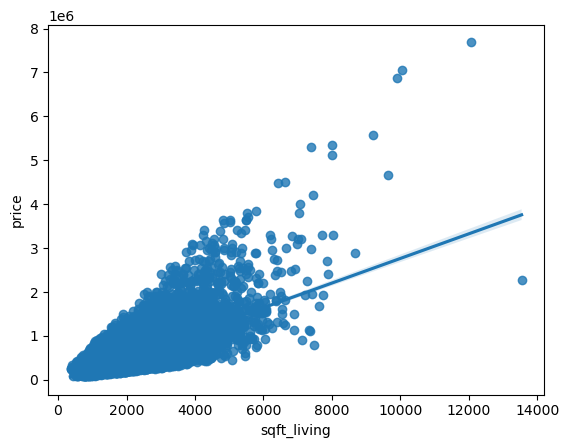

In [7]:
# scatter plot for sqft_above vs price
sns.regplot(x='sqft_living', y ='price', data=house_data)

In [8]:
X = house_data[['sqft_living']]
Y = house_data['price']
lm=linear_model.LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.49267663172823806

The above R-Squared coefficient is basically a measure of how successfully our model predicts the variations in the data away from the mean: which is currently at 50%

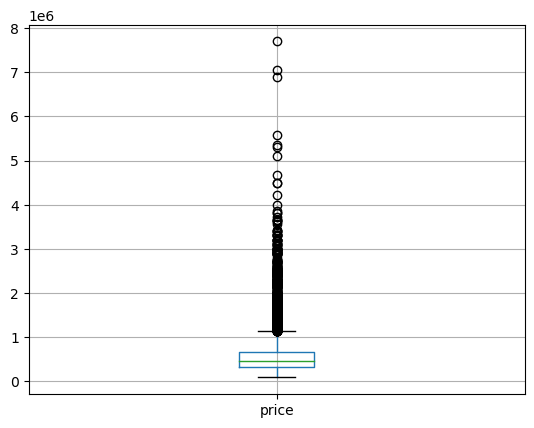

In [10]:
#Use boxplot to find the price distribution
house_data.boxplot(column = 'price')
plt.show()

In [13]:
house_corr = house_data.corr(numeric_only = True)

In [15]:
#use the Pandas method corr() to find the feature other than price that is most correlated with price
house_corr['price'].sort_values()

zipcode         -0.053437
long             0.022092
condition        0.036025
yr_built         0.053984
sqft_lot15       0.082837
sqft_lot         0.089882
yr_renovated     0.126415
floors           0.256814
waterfront       0.266437
lat              0.306777
bedrooms         0.308794
view             0.397318
bathrooms        0.525905
sqft_living15    0.585247
grade            0.667922
sqft_living      0.701909
price            1.000000
Name: price, dtype: float64

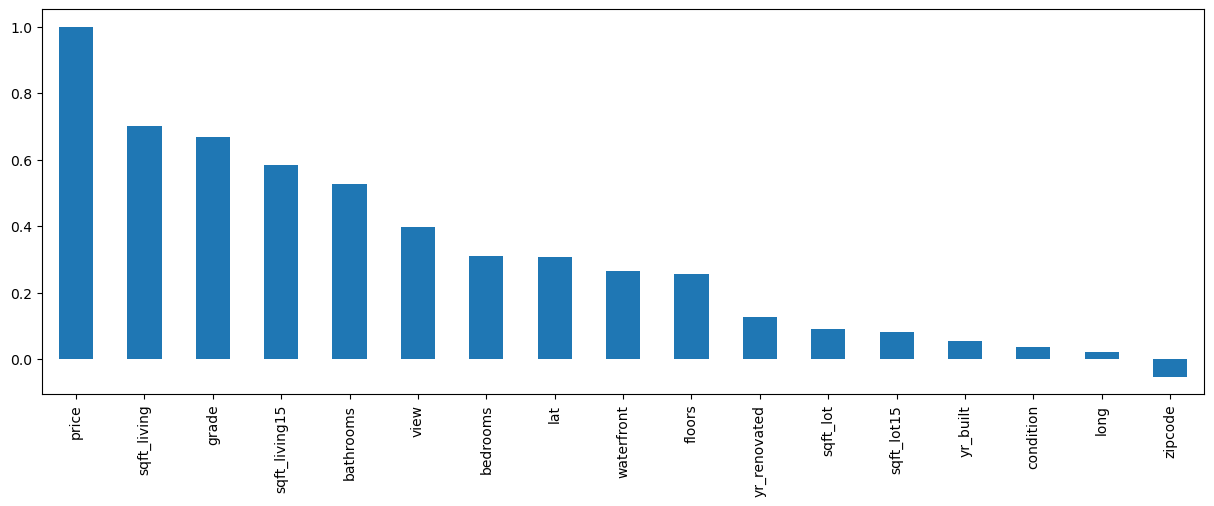

In [26]:
house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

As we can see from the bar graph that the pricing is related the sqft_living, grade, number of bathrooms, view, and number of bedroom

In [16]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

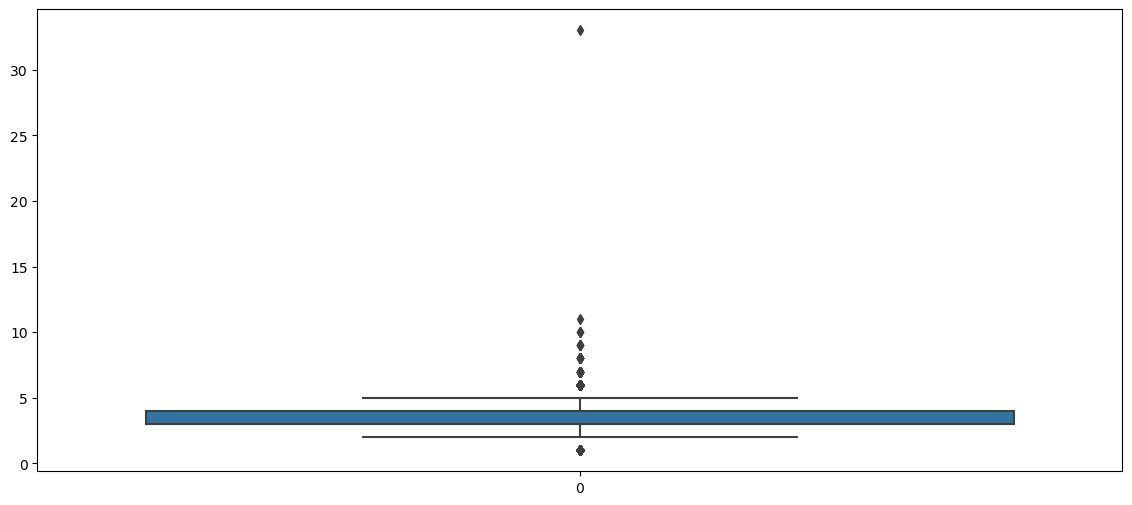

In [17]:
# Looking at the summary stats of bedrooms and also a boxplot
# we can see there is one entry that has 33 bedrooms
plt.figure(figsize=(14,6))
sns.boxplot(house_data.bedrooms)

In [18]:
# Let's look at the entries with more bedrooms just to check
# these entries - might be an error in entry
house_data[house_data.bedrooms > 8]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4092,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,1938,0,98103,47.6927,-122.338,1460,6291
4231,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,1908,0,98102,47.6374,-122.324,1960,2450
6073,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,1915,2010,98105,47.6604,-122.289,2510,5000
8537,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,1996,0,98144,47.5923,-122.301,1448,3866
8748,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,1918,1999,98106,47.5560,-122.363,1420,4960
13301,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2008,0,98004,47.5861,-122.113,2730,10400
15147,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,1958,0,98006,47.5705,-122.175,2040,11914
15856,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1947,0,98103,47.6878,-122.331,1330,4700
16830,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,1915,0,98105,47.6684,-122.309,2710,4320
18428,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1918,0,98105,47.6654,-122.307,2460,4400


In [19]:
#when we look at the outlier with 33 bedrooms we see that it has only 1.75 bathrooms and sqft of 1620 meaning it must have been entered incorrectly
house_data = house_data[house_data.bedrooms <= 11]

C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

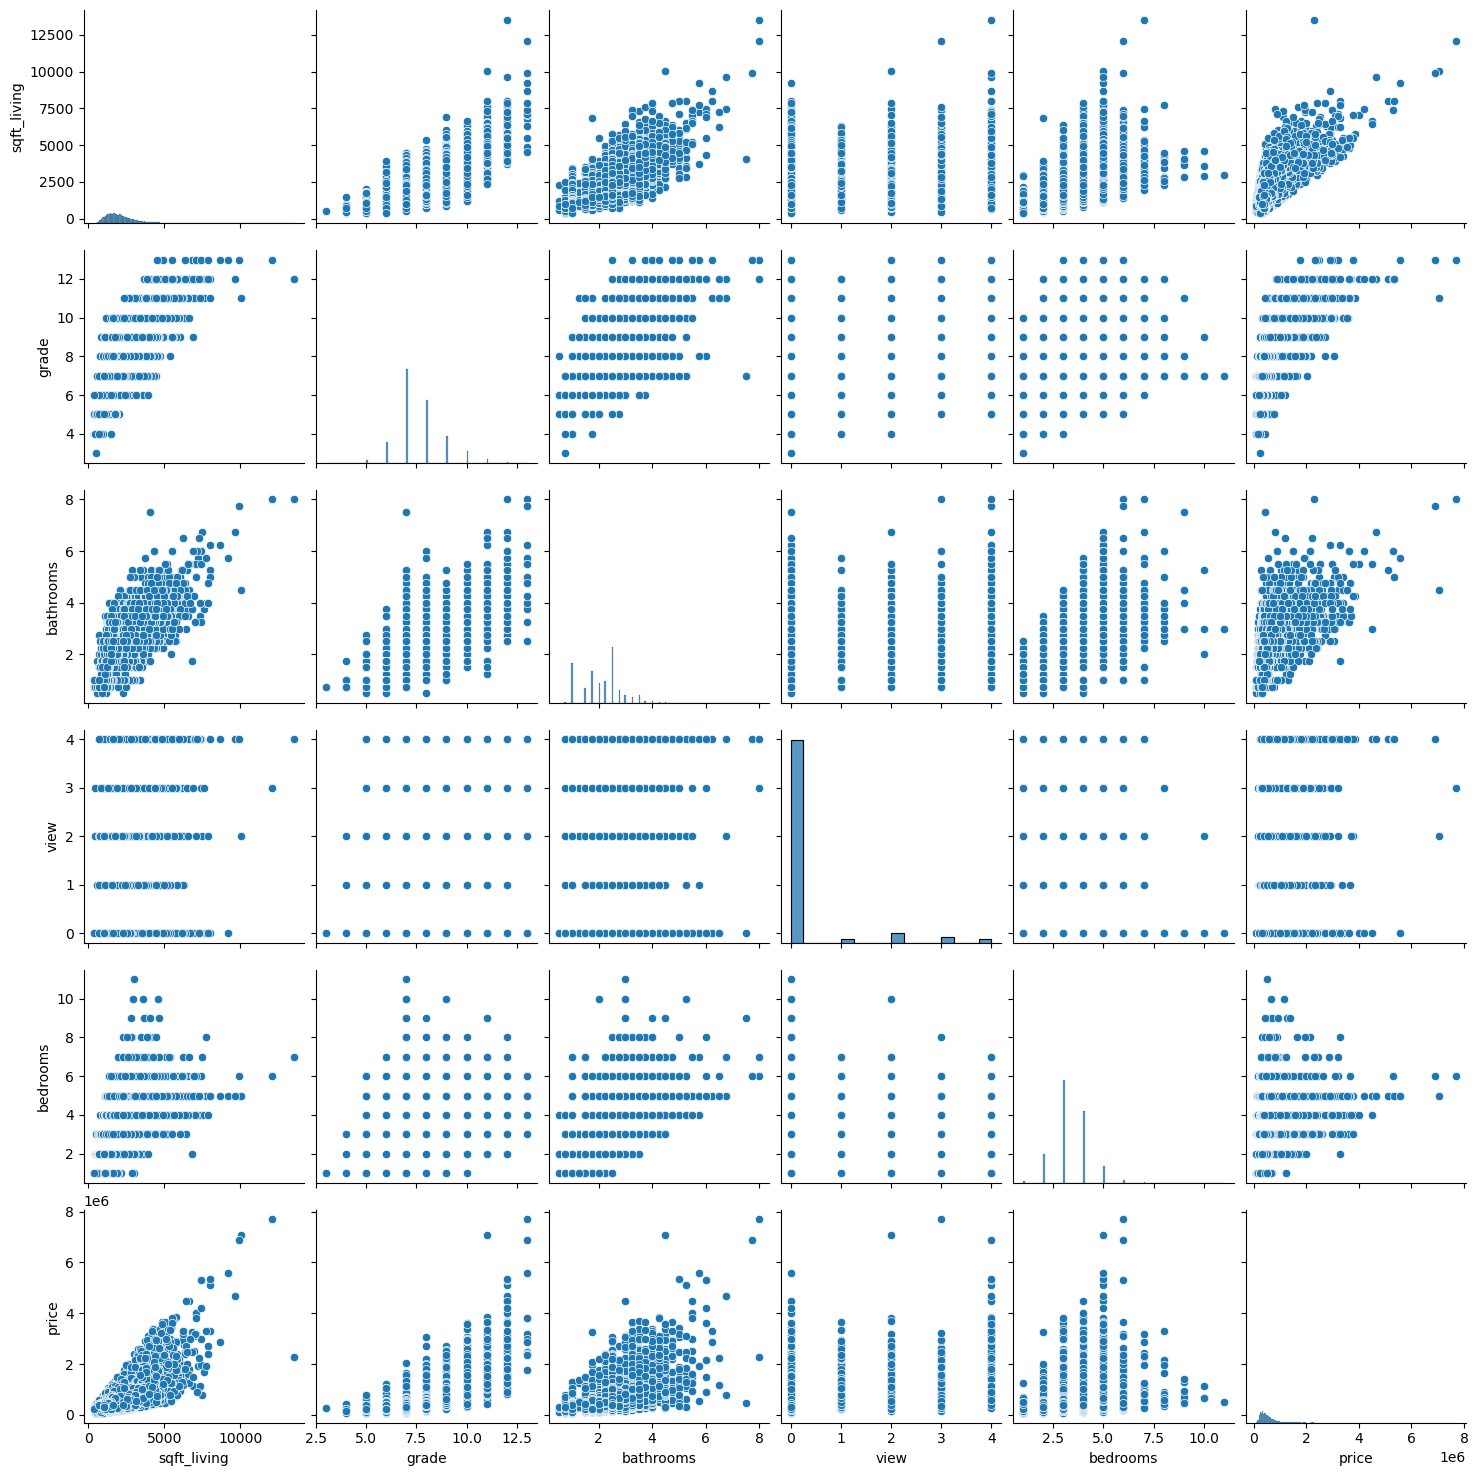

In [27]:
#Multivariate analysis is used for understanding the interactions between each fields in the dataset more than two. In this method, we will be using pairplot

features =["sqft_living", "grade", "bathrooms", "view", "bedrooms", "price"] 
sns.pairplot(house_data[features])
plt.show()

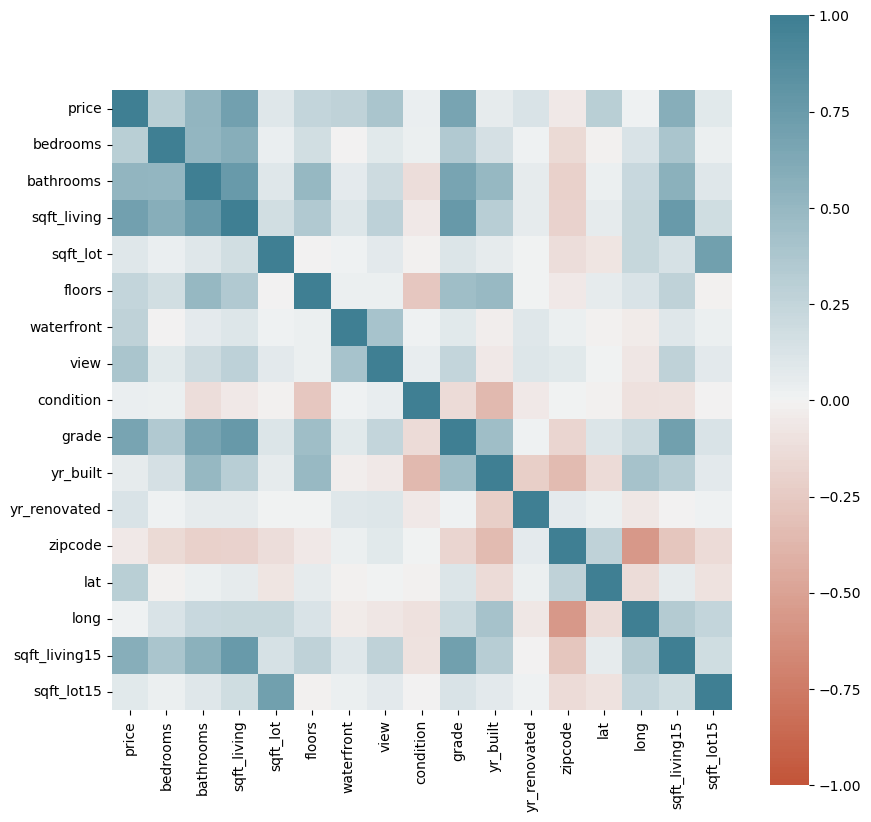

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(house_corr, 
    xticklabels = house_corr.columns.values, # x labels
    yticklabels = house_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

In [21]:
#Applying Regression Equation on the features
Y = house_data['price']
X = house_data[features]
lm.fit(X, Y)

LinearRegression()

In [22]:
lm.score(X, Y)

0.5458839214804595

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3240
number of training samples: 18356


In [24]:
# Save the data 
house_data.to_csv('kc_house_data_features.csv')